# <center> Projet Santé publique France  </center>

# <center> Partie nettoyage </center>

<img src="https://fr.blog.openfoodfacts.org/images/ag_2016_openfoodfacts_3.png" width=922>


### <center>Dataset : OpenFoodfacts </center>
### <center>  https://fr.openfoodfacts.org/data <center>

# Introduction 
5 min - Présentation de votre idée d’application.

L'agence "Santé publique France" a lancé un appel à projets pour trouver des idées innovantes d’applications en lien avec l'alimentation. Nous souhaitons y participer et proposer une idée d’application.

En 2023 les tickets de caisses seront dématérialisés. La dématérialisation du ticket pourrait permettre de nouveaux usages. En effet, les tickets pourraient inclure une dimension sanitaire. Par exemple, en donnant des informations sur la valeur nutritive des aliments achetés par le client. On pourrait donner cette information en exploitant le nutriscore. Cependant,le nutriscore est proposé uniquement sur une base de volontariat. Certains produits n'ont pas d'étiquettes nutriscore. Ansi notre application sera de proposer à Santé Public France un modèle statistique capable d'estimer ce nutriscore à partir de quelques features sur la base de données openfoodfacts.

Ci dessous quelques lien pour en savoir plus sur le nutri-score : <br>
    
* https://www.santepubliquefrance.fr/determinants-de-sante/nutrition-et-activite-physique/articles/nutri-score 
<br>

* https://fr.openfoodfacts.org/nutriscore?gclid=EAIaIQobChMI6f7n3KTv8wIV-wWiAx3U9wf3EAAYASAAEgJx-PD_BwE

### Liste des packages

In [1]:
#Ci dessous la liste des packages que nous utilsons pour ce projet.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import rpy2

#Afficher toute les colonnes
pd.set_option('display.max_columns', None)

print("Les packages sont chargés.")

Les packages sont chargés.


In [2]:
# Connaitre chemin
#import os
#path = os. getcwd()
#print("Le répertoire courant est : " + path)

### Chargement des données

In [3]:
df=pd.read_csv("Openfoodfacts.csv",sep="\t") #Openfoodfacts real data, 
#data_light=data.iloc[1:10000, 0:30]
#data_light.to_csv('data_light.csv', index=False)
print("Le dataset est chargé")

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (0,8,13,22,23,27,28,29,31,52,55,64) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Le dataset est chargé


Le warning nous indique que les colonnes (0,8,13,22,23,27,28,29,31,52,55,64) ont des types mixtes nous corrigerons donc cela au cours du nettoyage. <br><br>Ci-dessous les 5 premières lignes du dataset.

In [4]:
df.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,abbreviated_product_name,generic_name,quantity,packaging,packaging_tags,packaging_text,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,origins_en,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_en,ingredients_text,allergens,allergens_en,traces,traces_tags,traces_en,serving_size,serving_quantity,no_nutriments,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,brand_owner,ecoscore_score_fr,ecoscore_grade_fr,main_category,main_category_en,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy-kj_100g,energy-kcal_100g,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,-lignoceric-acid_100g,-cerotic-acid_100g,-montanic-acid_100g,-melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,-dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,-elaidic-acid_100g,-gondoic-acid_100g,-mead-acid_100g,-erucic-acid_100g,-nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,-soluble-fiber_100g,-insoluble-fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-dried_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,00000000000000225,http://world-en.openfoodfacts.org/product/0000...,nutrinet-sante,1623855208,2021-06-16T14:53:28Z,1623855209,2021-06-16T14:53:29Z,jeunes pousses,NaN,NaN,NaN,NaN,NaN,NaN,endives,endives,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:france,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","To be completed,Nutrition facts to be complete...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [5]:
print("le dataset contient " ,df.shape[0], "lignes et", df.shape[1], "colonnes.")

# Version light
#data_light=data.iloc[1:10000, 0:30]
#data_light.to_csv('data_light.csv', index=False)

le dataset contient  1989597 lignes et 186 colonnes.


In [6]:
#data.to_csv('your.csv', index=False)
#data.dropna( axis=0, how='any', thresh=None, subset=None, inplace=True)
#len(data)

In [7]:
#data.to_csv('your.csv', index=False)
#data_light.dropna( axis=0, how='any', inplace=True)
#len(data_light)

# <center> Nettoyage des données </center>

5 min - Présentation du nettoyage effectué.

### Gestion des valeurs manquantes

Dans cette partie nous nettoyerons les données. Concrétement nous mettrons en place une stratégie de traitement des valeurs manquantes

On considère que les colonnes ayant plus de 25% de valeurs manquantes ne sont pas pertinentes pour notre application.Ainsi nous les supprimons.

In [8]:
df.info(verbose=True,null_counts=True)

<ipython-input-8-a494a59f9abe>:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  df.info(verbose=True,null_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989597 entries, 0 to 1989596
Data columns (total 186 columns):
 #    Column                                      Non-Null Count    Dtype  
---   ------                                      --------------    -----  
 0    code                                        1989597 non-null  object 
 1    url                                         1989597 non-null  object 
 2    creator                                     1989593 non-null  object 
 3    created_t                                   1989597 non-null  int64  
 4    created_datetime                            1989597 non-null  object 
 5    last_modified_t                             1989597 non-null  int64  
 6    last_modified_datetime                      1989597 non-null  object 
 7    product_name                                1908053 non-null  object 
 8    abbreviated_product_name                    7107 non-null     object 
 9    generic_name                                

In [9]:
def Valeures_manquantes_col(df):
    """Gestion des valeurs manquantes d'un dataframe par colonne"""
    nb_colonnes=len(df.columns)
    pourcent_75_rows=int(df.shape[0]*0.75)
    for i in df.columns : 
        #print(df[i].isna().sum())
        if (df[i].isna().sum()> pourcent_75_rows) :
            df.drop(i, axis=1,inplace=True)
    print(nb_colonnes-len(df.columns),"colonnes ont été supprimés")
    return(df)



df=Valeures_manquantes_col(df)
df.shape

138 colonnes ont été supprimés


(1989597, 48)

Maintenant,on considère que les lignes ayant plus de 25% de valeurs manquantes ne sont pas pertinentes pour notre application.Ainsi nous les supprimons.

In [10]:
df['ratio'] = df.apply(lambda x: x.count(), axis=1) # ratio valeures manquantes par lignes
print(df.shape[1]*0.75)
df=df[df['ratio']>int(df.shape[1]*0.75)]
df.shape


36.75


(792318, 49)

In [11]:
df.head(102)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,brands,brands_tags,categories,categories_tags,categories_en,countries,countries_tags,countries_en,ingredients_text,serving_size,serving_quantity,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,main_category,main_category_en,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,ratio
6,0000000000100,http://world-en.openfoodfacts.org/product/0000...,del51,1444572561,2015-10-11T14:09:21Z,1444659212,2015-10-12T14:13:32Z,moutarde au moût de raisin,courte paille,courte-paille,"Epicerie, Condiments, Sauces, Moutardes","en:groceries,en:condiments,en:sauces,en:mustards","Groceries,Condiments,Sauces,Mustards",France,en:france,France,eau graines de téguments de moutarde vinaigre ...,NaN,NaN,0.0,0.0,0.0,18.0,d,NaN,Fat and sauces,Dressings and sauces,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",en:mustards,Mustards,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,NaN,NaN,NaN,NaN,NaN,936.0,8.2,2.2,29.0,22.0,5.1,4.600,1.8400,18.0,40
17,0000000000949,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1523440813,2018-04-11T10:00:13Z,1565268412,2019-08-08T12:46:52Z,Salade de carottes râpées,NaN,NaN,"Plats préparés, Légumes préparés, Carottes râp...","en:meals,en:prepared-vegetables,en:grated-carr...","Meals,Prepared vegetables,Grated carrots,Seaso...",France,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,1.0,b,NaN,Composite foods,One-dish meals,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",en:seasoned-shredded-carrots,Seasoned shredded carrots,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,NaN,NaN,32.0,134.0,0.3,0.1,5.3,3.9,0.9,0.420,0.1680,1.0,37
25,0000000001199,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1517833594,2018-02-05T12:26:34Z,1540674511,2018-10-27T21:08:31Z,Solène céréales poulet,CROUS,crous,NaN,NaN,NaN,France,en:france,France,"antioxydant : érythorbate de sodium, colorant ...",NaN,NaN,5.0,0.0,0.0,NaN,NaN,4.0,unknown,unknown,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",NaN,NaN,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,219.0,916.0,5.9,0.5,30.3,1.7,9.7,0.464,0.1856,NaN,38
26,0000000001281,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1517830801,2018-02-05T11:40:01Z,1527070794,2018-05-23T10:19:54Z,Tarte noix de coco,"Crous Resto',Crous","crous-resto,crous","Tartes, Tartes sucrées, Tartes à la noix de coco","en:pies,en:sweet-pies,en:coconut-pies","Pies,Sweet pies,Coconut pies",France,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,14.0,d,NaN,Sugary snacks,Biscuits and cakes,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",en:coconut-pies,Coconut pies,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc

Nous travaillons avec santé public France donc nous nous concentrerons sur les produits français

In [12]:
df['countries'] = df['countries_en'].str.upper()
df=df[df['countries']=="FRANCE"]
df.shape

(283572, 49)

In [13]:
#date
df["created_datetime"]=pd.to_datetime(df["created_datetime"],format="%Y-%m-%d",)
df["created_t"]=pd.to_datetime(df["created_t"], unit='s')
df["last_modified_t"]=pd.to_datetime(df["last_modified_t"], unit='s')


### Imputation valeur manquantes

In [14]:
df['nova_group'].fillna(df['nova_group'].median())
df['nova_group'].fillna(df['nova_group'].median())

6          4.0
17         4.0
25         4.0
26         4.0
36         4.0
          ... 
1989576    4.0
1989578    4.0
1989580    4.0
1989586    4.0
1989589    4.0
Name: nova_group, Length: 283572, dtype: float64

### Gestion des types

***type double

In [15]:
pd.to_datetime(df.created_t)
#pd.to_datetime(mergedFrame1000["order_purchase_timestamp"])

6         2015-10-11 14:09:21
17        2018-04-11 10:00:13
25        2018-02-05 12:26:34
26        2018-02-05 11:40:01
36        2017-11-20 12:18:57
                  ...        
1989576   2019-01-29 16:59:01
1989578   2018-10-15 09:55:58
1989580   2018-02-20 17:07:29
1989586   2019-01-21 15:57:57
1989589   2018-10-06 09:33:52
Name: created_t, Length: 283572, dtype: datetime64[ns]

### Gestion des valeurs abérrantes
##### Doublons

In [16]:
Longueur_dataset=len(df)
df.drop_duplicates(keep = 'first', inplace=True)
print(Longueur_dataset-len(df) ,"doublons ont été traité.")

0 doublons ont été traité.


##### Outliers

In [17]:
df.shape

(283572, 49)

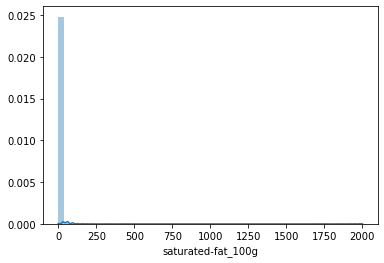

In [18]:
#avant
x = pd.Series(df["saturated-fat_100g"], name="saturated-fat_100g")
ax = sns.distplot(x)
plt.show()

In [19]:
#avant
x.describe()

count    281697.000000
mean          5.760043
std           9.265575
min           0.000000
25%           0.300000
50%           2.200000
75%           8.500000
max        2000.000000
Name: saturated-fat_100g, dtype: float64

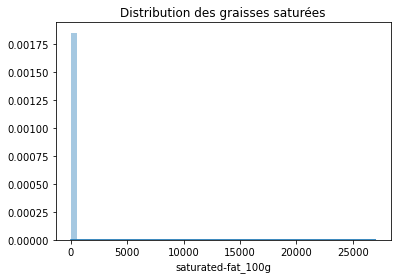

In [20]:
plt.title("Distribution des graisses saturées")
x = pd.Series(df["sugars_100g"], name="saturated-fat_100g")
ax = sns.distplot(x)
plt.show()

In [21]:
x.describe()

count    282281.000000
mean         12.393659
std          54.208546
min          -1.000000
25%           0.500000
50%           2.800000
75%          15.100000
max       27000.000000
Name: saturated-fat_100g, dtype: float64

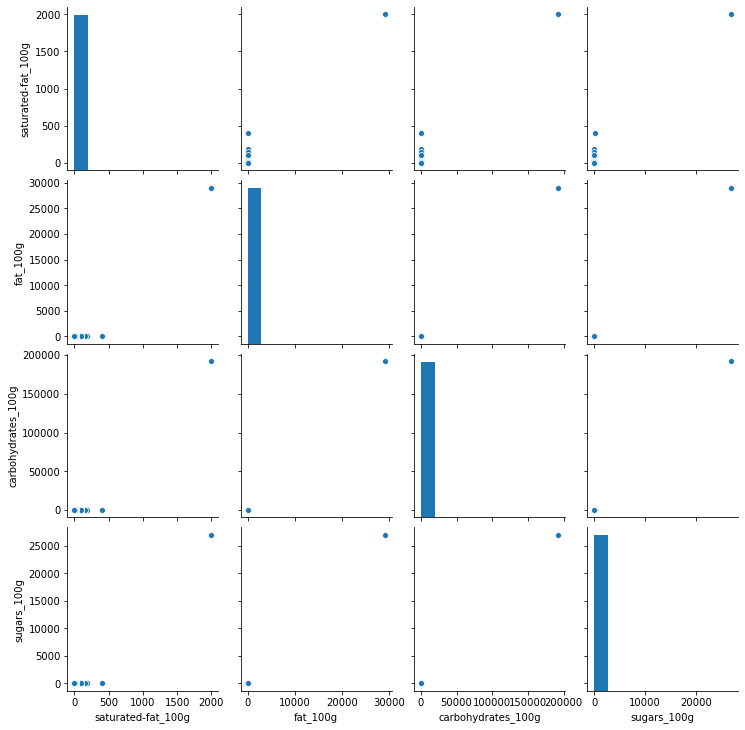

In [22]:
liste=["saturated-fat_100g","fat_100g","carbohydrates_100g","sugars_100g"]
avant=df[liste]
sns.pairplot(avant)
plt.show()


In [23]:
# Suppression outliers
df=df[df["saturated-fat_100g"]<100] # Supérieur à 100 
df=df[df["saturated-fat_100g"]>0] # Négatif
df=df[df["fat_100g"]<100] # Supérieur à 100 
df=df[df["fat_100g"]>0] # Négatif
df=df[df["carbohydrates_100g"]<100] # Supérieur à 100 
df=df[df["carbohydrates_100g"]>0] # Négatif
df=df[df["sugars_100g"]<100] # Supérieur à 100 
df=df[df["sugars_100g"]>0] # Négatif
df=df[df["saturated-fat_100g"]<100] # Supérieur à 100 
df=df[df["saturated-fat_100g"]>0] # Négatif
df=df[df["proteins_100g"]<100] # Supérieur à 100 
df=df[df["proteins_100g"]>0] # Négatif
df=df[df["salt_100g"]<100] # Supérieur à 100
df=df[df["salt_100g"]>0] # Négatif
df=df[df["sodium_100g"]<100] # Supérieur à 100
df=df[df["sodium_100g"]>0] # Négatif


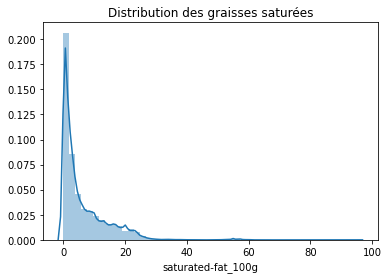

In [24]:
plt.title("Distribution des graisses saturées")
x = pd.Series(df["saturated-fat_100g"], name="saturated-fat_100g")
ax = sns.distplot(x)
plt.show()

In [25]:
x.describe()

count    2.066120e+05
mean     6.260714e+00
std      7.874656e+00
min      1.000000e-09
25%      9.000000e-01
50%      3.000000e+00
75%      9.200000e+00
max      9.520000e+01
Name: saturated-fat_100g, dtype: float64

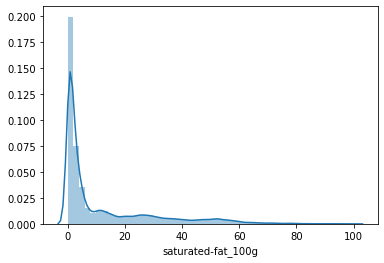

In [26]:
x = pd.Series(df["sugars_100g"], name="saturated-fat_100g")
ax = sns.distplot(x)
plt.show()

In [27]:
x.describe()

count    2.066120e+05
mean     1.200336e+01
std      1.714703e+01
min      1.000000e-09
25%      9.000000e-01
50%      3.100000e+00
75%      1.700000e+01
max      9.980000e+01
Name: saturated-fat_100g, dtype: float64

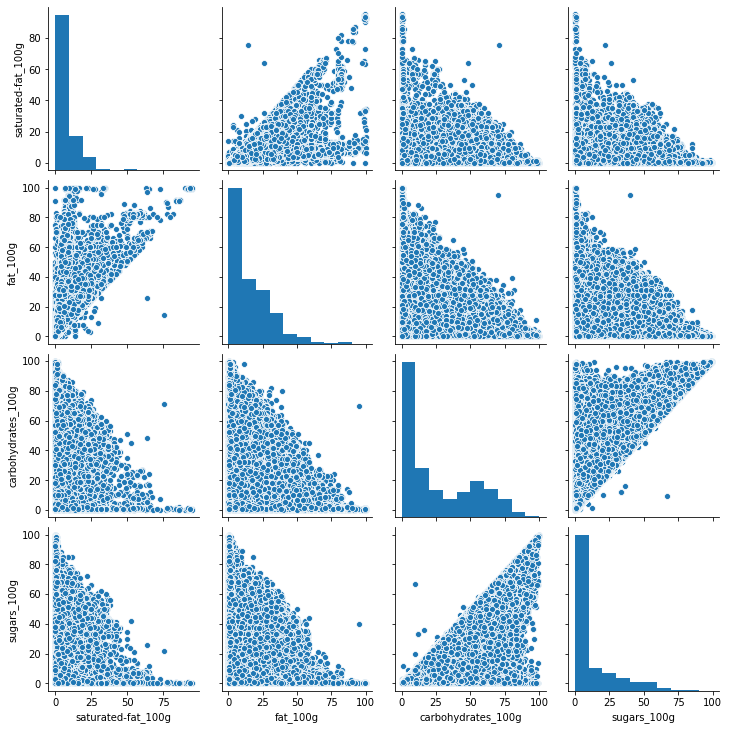

In [28]:
liste=["saturated-fat_100g","fat_100g","carbohydrates_100g","sugars_100g"]
après=df[liste]
sns.pairplot(après)
plt.show()


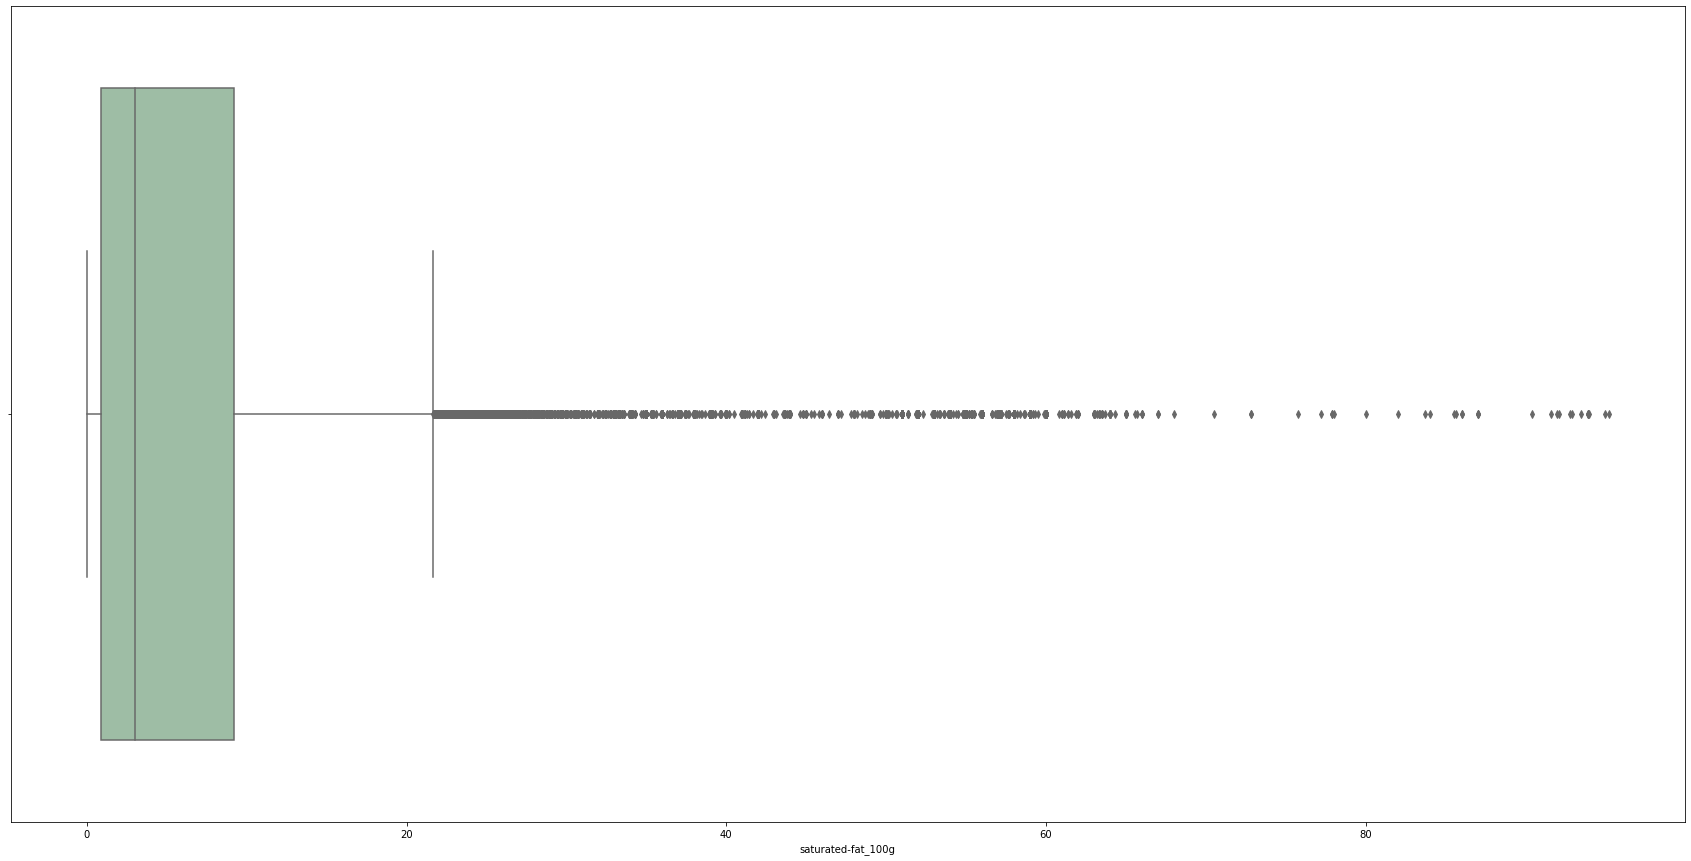

In [29]:
plt.figure(figsize=(30,15))
ax = sns.boxplot(x="saturated-fat_100g", data=df, color='#99c2a2')
plt.show()

In [30]:
df.shape

(206612, 49)

In [31]:
#sns.boxplot(data=df)
#ax.set_yscale('log')
#plt.show()te

In [32]:
#Sauveagarde_dataset
df.to_csv("Openfoodfacts_propre.csv",index=False)

Pour conclure cette phase de nettoyage. Nous avons pu constater que la base d'openfoodfacts est plutot sale. En effet, on a beaucoup de variable manquantes, des variables textuelles non exploitables ou encore quelques valeures abérrantes. Peut-être un effort devrait être fait sur la collecte des données ou leur diffusion. 
- Pour la collecte, on peut imaginer un meilleur compromis entre liberté de remplissage des formulaires et choix restreints. 
- Avant la diffusion, on peut imaginer des processus en back end qui nettoi les données avant leur diffusion.

# <center> Fin Nettoyage </center>
